# Q1 
Q1. Create a file “people.txt” with the following data:

i) Read the data from the file “people.txt”.
ii) Create a ruleset E that contain rules to check for the following conditions:
1. The age should be in the range 0-150.
2. The age should be greater than yearsmarried.
3. The status should be married or single or widowed.
4. If age is less than 18 the agegroup should be child, if age is between 18 and 65 the agegroup
should be adult, if age is more than 65 the agegroup should be elderly.
iii) Check whether ruleset E is violated by the data in the file people.txt.
iv) Summarize the results obtained in part (iii)

In [1]:
import numpy as np
import pandas as pd

### Reading CSV File

In [18]:
df = pd.read_csv("C:\\Users\\dhruv\\Desktop\\people.txt",delim_whitespace=True)

In [19]:
df.head()

,Age,agegroup,height,status,yearsmarried
0,21,adult,6.0,single,-1
1,2,child,3.0,married,0
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


## Creating RuleSet

In [28]:
def check_rules(row):
    age = row['Age']
    agegrp = row['agegroup']
    height = row['height']
    status = row['status']
    yrsmar = row['yearsmarried']
    
    if age<0 or age>150: return True
    if age<=yrsmar: return True
    if status not in ['married', 'single', 'widowed']: return True
    if age<18 and agegrp not in ['child']:return True
    if age>18 and age<65 and agegrp not in ['adult']:return True
    if age>65 and agegrp not in ['elderly']:return True
    
    return False

#apply function row-wise and then select the rows that
violate the rules using boolean indexing
violations = df[df.apply(check_rules, axis=1)]   

## Violations in dataset

In [29]:
violations

,Age,agegroup,height,status,yearsmarried
2,18,adult,5.7,married,20
3,221,elderly,5.0,widowed,2
4,34,child,-7.0,married,3


## Summarized & Visualized

In [32]:
df2 = df.apply(check_rules,axis=1)
df2

0    False
1    False
2     True
3     True
4     True
dtype: bool

<AxesSubplot:>

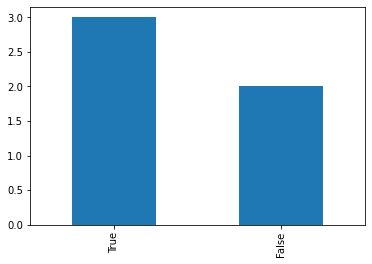

In [36]:
df2.value_counts().plot(kind='bar')